In [1]:
#get the latest set of images from UCAR
#Latest can be found at the catalog file
#cat = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/satellite/SFC-T/SUPER-NATIONAL_1km/current/catalog.xml')

In [2]:
#%%python3
# Magic not working

In [3]:
#link to the latest satellite imagery
latest <-'http://thredds.ucar.edu/thredds/dodsC/satellite/SFC-T/SUPER-NATIONAL_1km/current/SUPER-NATIONAL_1km_SFC-T_20170825_1900.gini'


In [4]:
latest

[1] "http://thredds.ucar.edu/thredds/dodsC/satellite/SFC-T/SUPER-NATIONAL_1km/current/SUPER-NATIONAL_1km_SFC-T_20170825_1900.gini"

In [5]:
#read the GINI as netCDF file
# load the ncdf4 package
library(ncdf4)

In [6]:
# open a netCDF file
ncin <- nc_open(latest)
print(ncin)

File http://thredds.ucar.edu/thredds/dodsC/satellite/SFC-T/SUPER-NATIONAL_1km/current/SUPER-NATIONAL_1km_SFC-T_20170825_1900.gini (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        char Stereographic[maxStrlen64]   
            grid_mapping_name: stereographic
            longitude_of_projection_origin: -105
            latitude_of_projection_origin: 90
            scale_factor_at_projection_origin: 0.93301269409307
            earth_radius: 6371229
            _CoordinateTransformType: Projection
            _CoordinateAxes: x y 
        byte SFC_T[x,y,time]   
            _Unsigned: true
            long_name: Surface Skin Temperature
            units: N/A
            scale_factor: 1
            add_offset: 0
            _CoordinateAxes: x y time

     4 dimensions:
        maxStrlen64  Size:64
        time  Size:1
            long_name: time since base date
            _CoordinateAxisType: Time
            units: msecs since 1970-01-01T00:00:00Z
       

In [7]:
# get proj x
x <- ncvar_get(ncin,"x")
nx <- dim(x)
head(nx)

[1] 1536

In [8]:
# get proj y
y <- ncvar_get(ncin,"y")
ny <- dim(y)
head(ny)

[1] 1008

In [9]:
print(c(nx,ny))

[1] 1536 1008


In [10]:
# get time
time <- ncvar_get(ncin,"time")
time

[1] 1.503688e+12

In [11]:
tunits <- ncatt_get(ncin,"time","units")
nt <- dim(time)
nt

[1] 1

In [12]:
dname <- "SFC_T"  # 
# get surface temperature
tmp_array <- ncvar_get(ncin,dname)
dlname <- ncatt_get(ncin,dname,"long_name")
dunits <- ncatt_get(ncin,dname,"units")
fillvalue <- ncatt_get(ncin,dname,"_FillValue")
dim(tmp_array)

[1] 1536 1008

In [13]:
library(rgdal)

xy <- as.data.frame(expand.grid(x,y))

Loading required package: sp
rgdal: version: 1.2-8, (SVN revision 663)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 1.11.3, released 2015/09/16
 Path to GDAL shared files: /usr/share/gdal/1.11
 Loaded PROJ.4 runtime: Rel. 4.9.2, 08 September 2015, [PJ_VERSION: 492]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-5 


In [14]:
coordinates(xy)= ~Var1 + Var2

In [15]:
proj.pol <- CRS('+proj=stere +lat_0=90 +lon_0=-105.0 +x_0=0.0 +y_0=0.0')
wgs <- CRS('+proj=longlat +datum=WGS84')
proj4string(xy) <- proj.pol
awgs <- spTransform(xy, wgs)
head(awgs)

SpatialPoints:
      Var1     Var2
1 168.5661 89.94532
2 168.5708 89.94539
3 168.5754 89.94546
4 168.5801 89.94553
5 168.5848 89.94560
6 168.5894 89.94567
Coordinate Reference System (CRS) arguments: +proj=longlat +datum=WGS84
+ellps=WGS84 +towgs84=0,0,0 

In [16]:
proj.pol <- CRS('+ellps=sphere +a=6371200.0 +b=6371200.0 +proj=stere +lat_0=90 +lon_0=-105.0 +x_0=0.0 +y_0=0.0 +no_defs')
wgs <- CRS('+proj=longlat +datum=WGS84')
proj4string(xy) <- proj.pol
awgs <- spTransform(xy, wgs)
head(awgs)

Warning message in `proj4string<-`(`*tmp*`, value = <S4 object of class structure("CRS", package = "sp")>):
"A new CRS was assigned to an object with an existing CRS:
+proj=stere +lat_0=90 +lon_0=-105.0 +x_0=0.0 +y_0=0.0 +ellps=WGS84
without reprojecting.
For reprojection, use function spTransform"

SpatialPoints:
      Var1     Var2
1 168.5661 89.94507
2 168.5708 89.94514
3 168.5754 89.94522
4 168.5801 89.94529
5 168.5848 89.94536
6 168.5894 89.94543
Coordinate Reference System (CRS) arguments: +proj=longlat +datum=WGS84
+ellps=WGS84 +towgs84=0,0,0 

In [17]:
summary(awgs)

Object of class SpatialPoints
Coordinates:
            min       max
Var1 -179.99987 179.99991
Var2   89.90676  89.99658
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0]
Number of points: 1548288

In [18]:
coordinates(awgs)

,Var1,Var2
1,168.5661,89.94507
2,168.5708,89.94514
3,168.5754,89.94522
4,168.5801,89.94529
5,168.5848,89.94536
6,168.5894,89.94543
7,168.5941,89.94550
8,168.5989,89.94557
9,168.6036,89.94564
10,168.6083,89.94571


In [19]:
bbox(awgs)

,min,max
Var1,-179.99987,179.99991
Var2,89.90676,89.99658


OGR data source with driver: ESRI Shapefile 
Source: ".", layer: "cb_2016_us_county_20m"
with 3220 features
It has 9 fields


[1] "+proj=longlat +datum=NAD83 +no_defs +ellps=GRS80 +towgs84=0,0,0"

,min,max
x,-124.72584,-66.94989
y,24.49813,49.38436


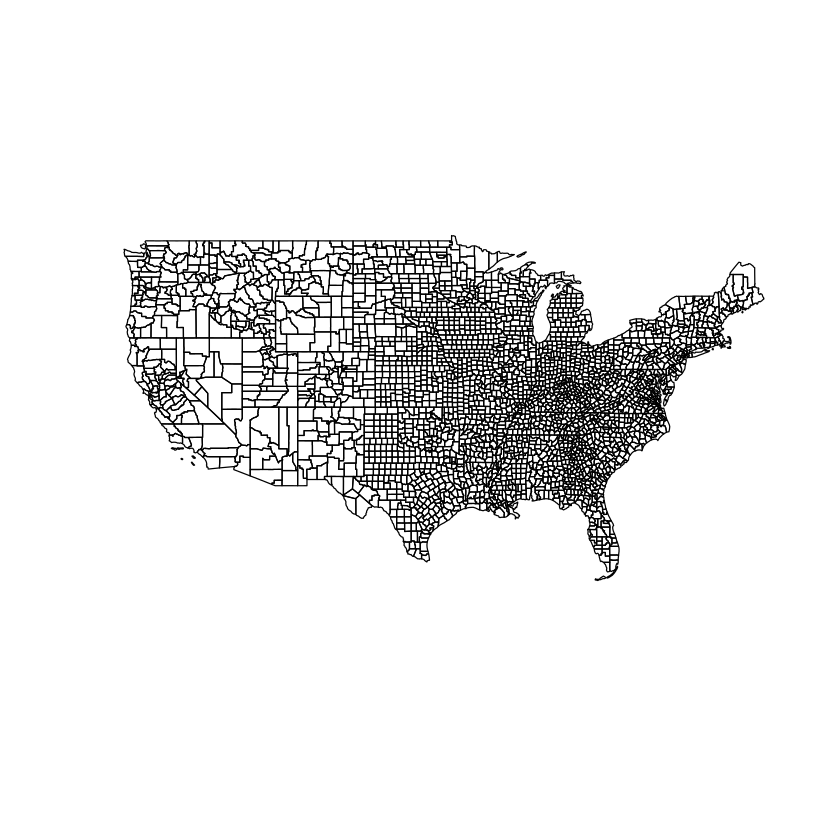

In [20]:
library(rgdal)    
# Download county shape file from Tiger.
# https://www.census.gov/geo/maps-data/data/cbf/cbf_counties.html
us.map <- readOGR(dsn=".", layer = "cb_2016_us_county_20m", stringsAsFactors = FALSE)
# Remove Alaska(2), Hawaii(15), Puerto Rico (72), Guam (66), Virgin Islands (78), American Samoa (60)
#  Mariana Islands (69), Micronesia (64), Marshall Islands (68), Palau (70), Minor Islands (74)
us.map <- us.map[!us.map$STATEFP %in% c("02", "15", "72", "66", "78", "60", "69",
                                        "64", "68", "70", "74"),]
# Make sure other outling islands are removed.
us.map <- us.map[!us.map$STATEFP %in% c("81", "84", "86", "87", "89", "71", "76",
                                        "95", "79"),]
proj4string(us.map) #
bbox(us.map)
plot(us.map)


In [21]:
summary(awgs)

Object of class SpatialPoints
Coordinates:
            min       max
Var1 -179.99987 179.99991
Var2   89.90676  89.99658
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0]
Number of points: 1548288

In [22]:
df_tmp <- data.frame(attr1 = LETTERS[1:10], attr2 = c(10:1))

In [23]:
str(df_tmp)

'data.frame':	10 obs. of  2 variables:
 $ attr1: Factor w/ 10 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10
 $ attr2: int  10 9 8 7 6 5 4 3 2 1


In [24]:
head(as.data.frame(tmp_array))


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V999,V1000,V1001,V1002,V1003,V1004,V1005,V1006,V1007,V1008
0,0,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0


In [25]:
str(tmp_array)

 int [1:1536, 1:1008] 0 0 0 0 0 0 0 0 0 0 ...


In [26]:
example = matrix(c(1,1,1,4,3,3,2,349,393,392,459,49,32,94), ncol = 2)
example[1,1]
example[2,1]
example[3,1]
example[4,1]
example[5,1]
example[6,1]
example[7,1]
example[1,2]

str(example)

[1] 1

[1] 1

[1] 1

[1] 4

[1] 3

[1] 3

[1] 2

[1] 349

 num [1:7, 1:2] 1 1 1 4 3 3 2 349 393 392 ...


In [27]:
unlist(example)

1,349
1,393
1,392
4,459
3,49
3,32
2,94


In [28]:
as.vector(example)


[1]   1   1   1   4   3   3   2 349 393 392 459  49  32  94

In [29]:
temp_df <- data.frame(sfct = as.vector(tmp_array))
awgs.spdf <- SpatialPointsDataFrame(awgs, temp_df)
summary(awgs.spdf)

Object of class SpatialPointsDataFrame
Coordinates:
            min       max
Var1 -179.99987 179.99991
Var2   89.90676  89.99658
Is projected: FALSE 
proj4string :
[+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0]
Number of points: 1548288
Data attributes:
      sfct       
 Min.   :  0.00  
 1st Qu.:  0.00  
 Median :  0.00  
 Mean   : 31.65  
 3rd Qu.:  0.00  
 Max.   :245.00  

Loading required package: ggplot2
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=89.951673,1.9e-05&zoom=13&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false


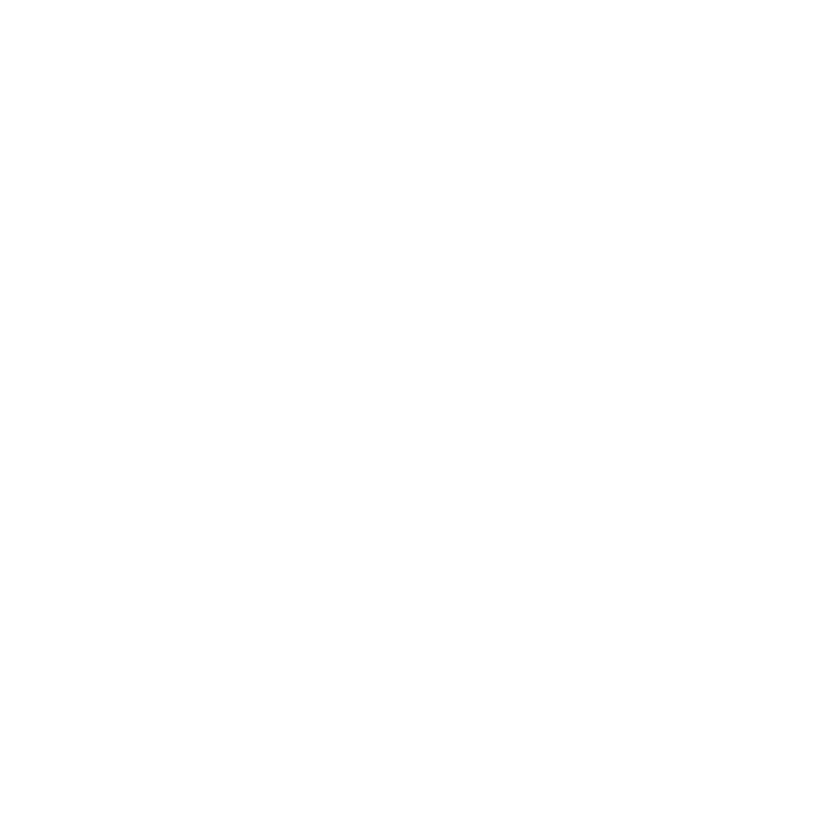

In [30]:
library(ggmap)    # loads ggplot2 as well
map <- get_map(location=rowMeans(bbox(awgs.spdf)), zoom=13)   # get Google map
ggmap(map) + 
  geom_point(data=as.data.frame(awgs.spdf), aes(x,y,fill=sfct), 
             color="grey70", size=3.5, shape=21)+
  scale_fill_gradientn(colours=rev(heat.colors(5)))

In [31]:
library(raster)

In [33]:
# quick ma
library(ggmap)    # loads ggplot2 as well
map <- get_map(location=rowMeans(bbox(awgs)), zoom=13)   # get Google map

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=89.951673,1.9e-05&zoom=13&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false


In [34]:
str(awgs)

Formal class 'SpatialPoints' [package "sp"] with 3 slots
  ..@ coords     : num [1:1548288, 1:2] 169 169 169 169 169 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:1548288] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "Var1" "Var2"
  ..@ bbox       : num [1:2, 1:2] -180 89.9 180 90
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "Var1" "Var2"
  .. .. ..$ : chr [1:2] "min" "max"
  ..@ proj4string:Formal class 'CRS' [package "sp"] with 1 slot
  .. .. ..@ projargs: chr "+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0"


In [35]:
awgs[1548280]@coords[2]

[1] 89.9071

In [36]:
tmp_array[1,200]

[1] 0

In [37]:
str(tmp_array)

 int [1:1536, 1:1008] 0 0 0 0 0 0 0 0 0 0 ...


In [38]:
which(tmp_array!=0,arr.ind = T)


row,col
245,209
240,210
244,210
245,210
248,210
239,211
240,211
243,211
244,211
245,211


In [39]:
tmp_array[245,209]

[1] 218

In [42]:
library(leaflet)
library(leaflet.extras)

In [49]:
leaflet(awgs.spdf) %>% addProviderTiles(providers$CartoDB.Positron) %>%
  setView( 178, -20, 5 ) %>%
  addHeatmap(lng = coordinates(awgs.spdf)[,1], lat = coordinates(awgs.spdf)[,2], intensity = ~mag,
             blur = 20, max = 0.05, radius = 15)

ERROR: Error in eval(intensity[[2]], data, environment(intensity)): object 'mag' not found


In [46]:
str(awgs.spdf)

Formal class 'SpatialPointsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	1548288 obs. of  1 variable:
  .. ..$ sfct: int [1:1548288] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ coords.nrs : num(0) 
  ..@ coords     : num [1:1548288, 1:2] 169 169 169 169 169 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:1548288] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:2] "Var1" "Var2"
  ..@ bbox       : num [1:2, 1:2] -180 89.9 180 90
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:2] "Var1" "Var2"
  .. .. ..$ : chr [1:2] "min" "max"
  ..@ proj4string:Formal class 'CRS' [package "sp"] with 1 slot
  .. .. ..@ projargs: chr "+proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0"


In [48]:
#longitude
head(coordinates(awgs.spdf)[,1])
#latitude
head(coordinates(awgs.spdf)[,2])
#data
head(awgs.spdf)

1        2        3        4        5        6 
168.5661 168.5708 168.5754 168.5801 168.5848 168.5894

1        2        3        4        5        6 
89.94507 89.94514 89.94522 89.94529 89.94536 89.94543